In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df

,Person_ID,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts,Name,Area
0,1,0,1,66278,3989,1,Con,Shenavan
1,2,0,0,64701,7076,1,Alphonso,Shubenka
2,3,1,1,28045,5659,1,Bordy,Chowṉêy
3,4,0,0,21690,6314,0,Margot,Pakxong
4,5,0,0,67479,9894,0,Denice,Ardazubre
...,...,...,...,...,...,...,...,...
1995,1996,0,1,54292,1468,1,Mozes,Salaza
1996,1997,1,0,63079,7574,0,Hally,Danderyd
1997,1998,1,0,69959,1788,1,Felice,Nowa Ruda
1998,1999,0,1,70333,7494,0,Issi,Zhangguanying


In [4]:
df.dtypes

Person_ID            int64
Own_House            int64
Own_vehicle          int64
Monthly_Salary       int64
Standard_Savings     int64
Bank_Debts           int64
Name                object
Area                object
dtype: object

In [5]:
df.isna().sum()

Person_ID           0
Own_House           0
Own_vehicle         0
Monthly_Salary      0
Standard_Savings    0
Bank_Debts          0
Name                0
Area                0
dtype: int64

In [6]:
df.columns

Index(['Person_ID', 'Own_House', 'Own_vehicle', 'Monthly_Salary',
       'Standard_Savings', 'Bank_Debts', 'Name', 'Area'],
      dtype='object')

In [7]:
from sklearn.cluster import KMeans

In [8]:
sse = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(df[['Own_House', 'Own_vehicle', 'Monthly_Salary','Standard_Savings', 'Bank_Debts']])
    sse.append(km.inertia_)

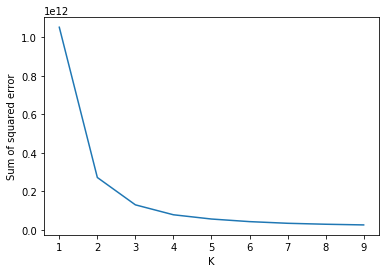

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1,10),sse)

In [10]:
KM = KMeans(n_clusters = 4)
predict = KM.fit_predict(df[['Own_House', 'Own_vehicle', 'Monthly_Salary','Standard_Savings', 'Bank_Debts']])
pd.DataFrame(predict)
df["Groups"] = predict
df

,Person_ID,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts,Name,Area,Groups
0,1,0,1,66278,3989,1,Con,Shenavan,0
1,2,0,0,64701,7076,1,Alphonso,Shubenka,0
2,3,1,1,28045,5659,1,Bordy,Chowṉêy,1
3,4,0,0,21690,6314,0,Margot,Pakxong,1
4,5,0,0,67479,9894,0,Denice,Ardazubre,0
...,...,...,...,...,...,...,...,...,...
1995,1996,0,1,54292,1468,1,Mozes,Salaza,2
1996,1997,1,0,63079,7574,0,Hally,Danderyd,0
1997,1998,1,0,69959,1788,1,Felice,Nowa Ruda,0
1998,1999,0,1,70333,7494,0,Issi,Zhangguanying,0


In [11]:
predict = df.loc[:,["Person_ID","Groups"]]
predict.to_csv("D:\\Skillenza_Bootcamp\\ML Level1\\Problem2\\Customer_Segment11.csv",index = False)